# Popular Data Science Questions

In this project, I will be analyzing which data science questions are best to write a content on. Mainly, I will be using [Stack Exchange Website](https://data.stackexchange.com/datascience/query/new) to help me with my analysis. 
This website requires SQL query to pull a specific data. After examining the data base, I decided to pull data from _Posts_ table. 

### SQL Query:
    SELECT 
          Id,
          CreationDate,
          Score,
          ViewCount,
          Tags,
          AnswerCount,
          FavoriteCount
    FROM Posts
    WHERE CreationDate >= 2019;

(c) Miradiz Rakhmatov

## Data Exploration

Lets examine the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
questions = pd.read_csv('2019_questions.csv')
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [3]:
questions.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

In [4]:
questions.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


## Data Cleaning

#### In this section, I'm going to :
1. Convert _CreationDate_ column into appropriate datatype (datetime)
2. Fill NaN values with 0 for _FavoriteCount_ column
3. Convert _FavoriteCount_ column into int datatype
4. Perform string manipulation in _Tags_ column to remove unnecessary characters 

In [5]:
## convert the column to datetime 
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])

In [6]:
## fill NaN with 0
## convert the column to int
questions.fillna(value={'FavoriteCount': 0}, inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)

In [7]:
## remove unnecessary characters
## create a list of strings (tags) by splitting " " 
questions['Tags'] = questions['Tags'].str.replace("<", "").str.replace(">", " ").str.strip().str.split(" ")


In [8]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [9]:
questions[['ViewCount','Tags']].head(10)

,ViewCount,Tags
0,21,"[machine-learning, data-mining]"
1,25,"[machine-learning, regression, linear-regressi..."
2,1651,"[python, time-series, forecast, forecasting]"
3,55,"[machine-learning, scikit-learn, pca]"
4,19,"[dataset, bigdata, data, speech-to-text]"
5,283,[fuzzy-logic]
6,214,"[time-series, anomaly-detection, online-learning]"
7,9,[matrix-factorisation]
8,7,"[correlation, naive-bayes-classifier]"
9,584,"[machine-learning, python, deep-learning, kera..."


## Data Analysis Part 1:

1. Find out how many times each tag was used 
2. Find out how many times each tag was viewed 


In [10]:
tags = questions['Tags']
views = questions['ViewCount']

In [11]:
tags_used = {}
tags_viewed = {}

## since tags and views are the same length (rows) I'm going to iterate through them simultaneously 

for lis, v in zip(tags, views):
    for t in lis:
        if t in tags_used:
            tags_used[t] += 1
            tags_viewed[t] += v
        else:
            tags_used[t] = 1
            tags_viewed[t] = v

In [12]:
## frequency dictionary of tags and their corresponding usage count
## let's convert dictionary into pandas.Series
## python dictionary will take a lot of space on the screen
pd.Series(tags_used)

machine-learning       2693
data-mining             217
regression              347
linear-regression       175
regularization           50
                       ... 
encoder                   1
label-smoothing           1
label-flipping            1
3d-object-detection       1
kitti-dataset             1
Length: 526, dtype: int64

In [13]:
## frequency dictionary of tags and their corresponding view count
## let's convert dictionary into pandas.Series
## python dictionary will take a lot of space on the screen
pd.Series(tags_viewed)

machine-learning       388499
data-mining             31056
regression              49451
linear-regression       18978
regularization           4941
                        ...  
encoder                    16
label-smoothing           480
label-flipping            480
3d-object-detection         7
kitti-dataset               7
Length: 526, dtype: int64

In [14]:
## let's convert the above dictionary with tag usage into DataFrame 
tags_used_dict = {'Tags': list(tags_used.keys()), 
                  'Used': list(tags_used.values())}

## sort the DataFrame by Used column in descending order to display the popular tags by usage 
most_20_used = pd.DataFrame(tags_used_dict).sort_values('Used', ascending=False).reset_index(drop=True).head(20)
most_20_used

,Tags,Used
0,machine-learning,2693
1,python,1814
2,deep-learning,1220
3,neural-network,1055
4,keras,935
5,classification,685
6,tensorflow,584
7,scikit-learn,540
8,nlp,493
9,cnn,489


In [15]:
## let's convert the above dictionary with tag views into DataFrame 
tags_viewed_dict = {'Tags': list(tags_viewed.keys()), 
                    'Viewed': list(tags_viewed.values())}
## sort the DataFrame by Used column in descending order to display the popular tags by amount of views
most_20_viewed = pd.DataFrame(tags_viewed_dict).sort_values('Viewed', ascending=False).reset_index(drop=True).head(20)
most_20_viewed


,Tags,Viewed
0,python,537585
1,machine-learning,388499
2,keras,268608
3,deep-learning,233628
4,pandas,201787
5,neural-network,185367
6,scikit-learn,128110
7,tensorflow,121369
8,classification,104457
9,dataframe,89352


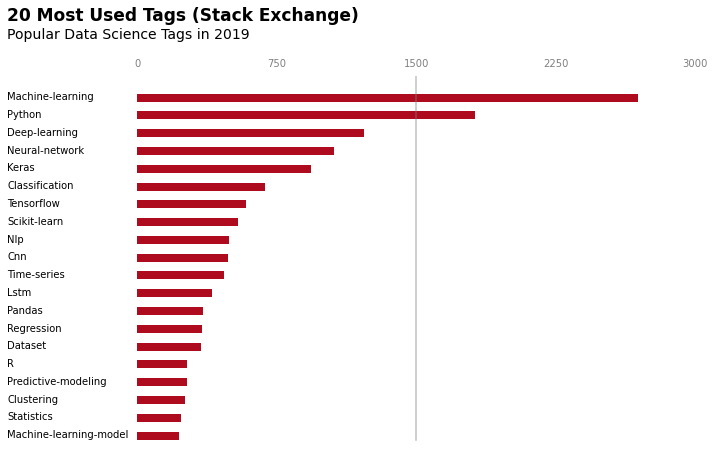

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(most_20_used.sort_values('Used',ascending=True)['Tags'], ## sorting the DataFrame in reverse order 
        most_20_used.sort_values('Used',ascending=True)['Used'],
        height=0.45, color='#af0b1e')

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)          ## remove the entire frame around the bar
ax.set_xticks([0, 750, 1500, 2250, 3000])           ## set xtick values 
ax.set_xticklabels(['0', '750', '1500', '2250', '3000'])  ## label xtick values 
ax.xaxis.tick_top()                                 ## move x axis tick to the top
ax.tick_params(top=False, left=False)               ## remove ticks from labels from both top and left
ax.tick_params(axis='x', colors='grey')             ## set the color of x ticks to grey
ax.text(x=-700, y=23.3, s='20 Most Used Tags (Stack Exchange)', size=17, weight='bold') ## title
ax.text(x=-700, y=22.3, s='Popular Data Science Tags in 2019', size=14)                   ## subtitle

ax.set_yticklabels([])  ## remove the original yticklabels (tags)
tags = most_20_used.sort_values('Used',ascending=True)['Tags']   
for i, tag in zip(range(20), tags):                 
    ax.text(x=-700, y=i-0.15, s=tag.capitalize()) ## create new yticklabels (tags) by itterating 20 most used tags 

ax.axvline(x=1500, ymin=0.045, c='grey', alpha=0.5)  ## set a vertical line to split the bar into two
plt.show()

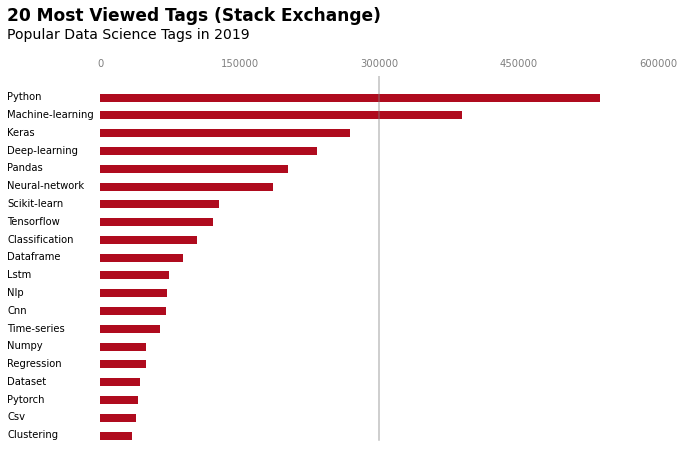

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(most_20_viewed.sort_values('Viewed',ascending=True)['Tags'],   ## sorting the DataFrame in reverse order 
        most_20_viewed.sort_values('Viewed',ascending=True)['Viewed'],
        height=0.45, color='#af0b1e')

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)          ## remove the entire frame around the bar
ax.set_xticks([0, 150000, 300000, 450000, 600000])  ## set xtick values
ax.set_xticklabels(['0', '150000', '300000', '450000', '600000'])
ax.xaxis.tick_top()                                 ## move x axis tick to the top
ax.tick_params(top=False, left=False)               ## remove ticks from labels from both top and left
ax.tick_params(axis='x', colors='grey')             ## set the color of x ticks to grey
ax.text(x=-100000, y=23.3, s='20 Most Viewed Tags (Stack Exchange)', size=17, weight='bold')  ## title
ax.text(x=-100000, y=22.3, s='Popular Data Science Tags in 2019', size=14)                    ## subtitle

ax.set_yticklabels([])  ## remove the original yticklabels (tags)
tags = most_20_viewed.sort_values('Viewed',ascending=True)['Tags']   
for i, tag in zip(range(20), tags):
    ax.text(x=-100000, y=i-0.15, s=tag.capitalize()) ## create new yticklabels (tags) by itterating 20 most used tags 

ax.axvline(x=300000, ymin=0.045, c='grey', alpha=0.5)  ## set a vertical line to split the bar into two
plt.show()

# Findings:

As you can see above, both of the bars include "python", "machine-learning", "keras" and "deep-learning". This means that those tags are the most popular among questions.

# Conclusion:
It would be best to write content on the following topics: python, machine-learning, keras and deep-learning. These tags tend to appear on the stack exchange pretty often. Since python is mostly interconnected with machine-learning, keras and deep-learning, it would make sense to write a content on python's implementations. 

## Data Analysis Part 2:


In this section I will analyze how many deep learning questions are asked per time period. Since I'm going to work with timeline, I need the current data set with all the years in it.
To complete this task I will use the following SQL query to retrieve the data:
    
    SELECT 
          Id,
          CreationDate,
          Tags
    FROM Posts;



## Data Exploration:

Let's examine the dataset

In [18]:
all_questions = pd.read_csv('all_questions.csv')

In [19]:
all_questions

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...
...,...,...,...
21571,36971,2018-08-15 14:19:01,<statistics><data>
21572,36974,2018-08-15 14:40:27,<machine-learning><neural-network><classifier>
21573,36975,2018-08-15 14:53:43,<machine-learning><classification>
21574,36979,2018-08-14 19:31:43,<tensorflow><python>


In [20]:
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21576 non-null  int64 
 1   CreationDate  21576 non-null  object
 2   Tags          21576 non-null  object
dtypes: int64(1), object(2)
memory usage: 505.8+ KB


## Data Cleaning:

Here I'm going to remove characters from _Tags_ column like I did for the previous dataset.

In [21]:
all_questions['Tags'] = all_questions['Tags'].str.replace("<", "").str.replace(">", " ").str.strip().str.split(" ")

In [22]:
all_questions

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."
...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]"
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]"
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]"
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]"


## Data Analysis:

Let's analyze interest in Deep Learning changed over time.

In [23]:
## categorize what is considered to be a Deep Learning question

def dl(x):
    dl_tags = ["deep-learning",  "neural-network", "scikit-learn", "tensorflow", "keras"]
    for tag in x:
        if tag in dl_tags:
            return True
    return False

## create a column that gives a boolean value if the tags in that row are related to Deep Learning question
all_questions['Deep learning questions'] = all_questions['Tags'].map(dl)

In [24]:
all_questions

,Id,CreationDate,Tags,Deep learning questions
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",True
1,45418,2019-02-12 00:50:39,[neural-network],True
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",False
3,45426,2019-02-12 04:51:49,[keras],True
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",False
...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",False
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",True
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",False
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",True


In [25]:
## isolate the rows that only have questions related to Deep Learning
## we only need two columns from now on: date when question was created, tags involved in those questions

dl_questions = all_questions.loc[all_questions['Deep learning questions'] == True, ['CreationDate','Tags']].copy()

In [26]:
dl_questions

,CreationDate,Tags
0,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,2019-02-12 00:50:39,[neural-network]
3,2019-02-12 04:51:49,[keras]
8,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]"
9,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]"
...,...,...
21566,2018-08-15 06:53:37,"[neural-network, time-series, lstm, recurrent-..."
21570,2018-08-15 13:40:54,"[machine-learning, keras, tensorflow, cnn]"
21572,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]"
21574,2018-08-14 19:31:43,"[tensorflow, python]"


### Steps to complete the task:

1. Divide years into quarters 
2. Group the dataset by year-quarter to count number of Deep Learning questions within specific quarter

In [27]:
## let's extract dates in 'yyyy-mm' format from CreationDate column
## since the datatype for the column is Object whcich has strings in it, I'm going to perform string manipulation
dl_questions['CreationDate'] = dl_questions['CreationDate'].map(lambda x: x[:7])   ##[:7] extracts yyyy-mm only


In [28]:
## let's see how many unique dates we have in CreationDate column
dl_questions['CreationDate'].unique()

array(['2019-02', '2018-08', '2019-07', '2017-11', '2016-10', '2014-05',
       '2016-11', '2014-06', '2018-09', '2014-07', '2017-12', '2016-12',
       '2019-03', '2014-08', '2014-09', '2014-10', '2017-01', '2019-08',
       '2014-11', '2014-12', '2018-01', '2015-01', '2017-02', '2018-10',
       '2015-02', '2015-03', '2017-03', '2015-04', '2015-05', '2018-02',
       '2019-04', '2015-06', '2017-04', '2019-09', '2018-11', '2015-07',
       '2015-08', '2017-05', '2015-09', '2018-03', '2015-10', '2017-06',
       '2018-12', '2015-11', '2019-05', '2019-10', '2015-12', '2018-04',
       '2017-07', '2016-01', '2019-01', '2017-08', '2016-02', '2018-05',
       '2019-11', '2016-03', '2017-09', '2019-06', '2016-04', '2017-10',
       '2016-05', '2016-06', '2018-06', '2019-12', '2016-07', '2016-08',
       '2018-07', '2020-01', '2016-09'], dtype=object)

In [29]:
## the last date (yyyy-mm) in dataset
dl_questions['CreationDate'].unique().max()

'2020-01'

In [30]:
## let's remove the above month from dataset since it doesn't make a complete quarter 
dl_questions.drop(dl_questions[dl_questions['CreationDate'] == '2020-01'].index, inplace=True)
dl_questions['CreationDate'].unique().max()

'2019-12'

In [31]:
## convert yyyy-mm to year-quarter format
def quarter(x):
    quarters = {'Q1' : ['01', '02', '03'],
                'Q2' : ['04', '05', '06'],
                'Q3' : ['07', '08', '09'],
                'Q4' : ['10', '11', '12']}
    for k, v in quarters.items(): 
        if x[5:] in v:                
            return x[2:4]+k
    
    ## x[2:4] last two digits in yyyy format
    ## x[5:] month in mm format

dl_questions['Quarter'] = dl_questions['CreationDate'].map(quarter)

In [32]:
dl_questions

,CreationDate,Tags,Quarter
0,2019-02,"[python, keras, tensorflow, cnn, probability]",19Q1
1,2019-02,[neural-network],19Q1
3,2019-02,[keras],19Q1
8,2019-02,"[python, keras, tensorflow, lstm]",19Q1
9,2019-02,"[neural-network, feature-selection, mlp]",19Q1
...,...,...,...
21566,2018-08,"[neural-network, time-series, lstm, recurrent-...",18Q3
21570,2018-08,"[machine-learning, keras, tensorflow, cnn]",18Q3
21572,2018-08,"[machine-learning, neural-network, classifier]",18Q3
21574,2018-08,"[tensorflow, python]",18Q3


In [33]:
## group the dataset above by Quarter to count number of Deep Learning questions asked 
grouped = dl_questions.groupby('Quarter').size().reset_index().rename(columns={0: "Number of questions"})
grouped

,Quarter,Number of questions
0,14Q2,9
1,14Q3,13
2,14Q4,21
3,15Q1,18
4,15Q2,28
5,15Q3,45
6,15Q4,66
7,16Q1,110
8,16Q2,109
9,16Q3,161


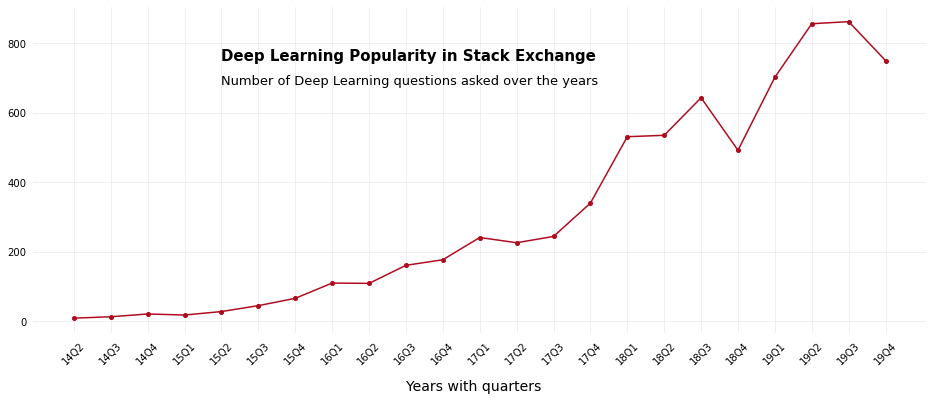

In [34]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(grouped['Quarter'], grouped['Number of questions'], color='#af0b1e', marker="o", markersize=4)
ax.set_xticks(list(grouped['Quarter']))               ## set labels from Quarter column
ax.text(4, 750, 'Deep Learning Popularity in Stack Exchange', size=15, weight='bold')
ax.text(4, 680, 'Number of Deep Learning questions asked over the years', size=13)
ax.text(9, -200, 'Years with quarters', size=14)
ax.set_xticklabels(labels=list(grouped['Quarter']), rotation=45) 
ax.grid(alpha=0.25)                                   ## include grids
ax.tick_params(bottom=0, left=0)                      ## remove ticks (-) from both axis 
for location in ['left', 'right', 'top', 'bottom']: 
    ax.spines[location].set_visible(False)            ## remove the entire frame from the chart

### Findings:
As you can see above, Deep Learning questions weren't quite popular as it is still considered to be novelty. Nevertheless, it changed over time gradually. For example, from the second quarter of 2014 through the third quarter of 2018 the popularity among Deep Learning increased swiftly.

# THE END